# Algoritmos numéricos

## Introdução (algoritmo babilónico)


> Um **algoritmo** é um procedimento, 
> indicado passo a passo, 
> destinado a resolver um problema 
> num intervalo de tempo finito.


**Algoritmo para calcular raízes quadradas**

Para calcular a raíz quadrada de um número a:

1. Fazer $x = 1$

2. Fazer $x = \frac{1}{2} \left( x + a/x \right)$

3. Repetir 20 vezes o passo 2

$x$ é a raíz quadrada de $a$.

In [1]:
a = 2.0

x = 1.0
for i in range(20):
    x = 0.5 * (x + a/x)

print x

1.41421356237


In [2]:
a = 2.0

x = 1.0
for i in range(20):
    print x
    x = 0.5 * (x + a/x)

print "A raíz quadrada de {} é {}".format(a,x)

1.0
1.5
1.41666666667
1.41421568627
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
1.41421356237
A raíz quadrada de 2.0 é 1.41421356237


**Algoritmo para calcular raízes quadradas**

Para calcular a raíz quadrada de um número a:

1. Fazer $x_0 = 1$

2. Fazer $x_{i+1} = \frac{1}{2} \left( x_i + a/x_i \right)$

3. Repetir o passo 2 até $|x_{i+1} - x_i| < 10^{-10}$

x é a raíz quadrada de a.


In [3]:
a = 2.0

x = 1.0
for i in range(100):
    print x
    novo = 0.5 * (x + a/x)
    if abs(novo - x) < 1e-10:
        x = novo
        break
    x = novo

print "A raíz quadrada de {} é {}".format(a,x)

1.0
1.5
1.41666666667
1.41421568627
1.41421356237
A raíz quadrada de 2.0 é 1.41421356237


In [4]:
def babilonico(a):
    x = 1.0
    for i in range(100):
        print x
        novo = 0.5 * (x + a/x)
        if abs(novo - x) < 1e-10:
            return novo
        x = novo
    return x

r = babilonico(2.0)
print "A raíz quadrada de {} é {}".format(a,r)

1.0
1.5
1.41666666667
1.41421568627
1.41421356237
A raíz quadrada de 2.0 é 1.41421356237


## Método das bisseções sucessivas

**Método das bisseções sucessivas** (para calcular a raíz de uma função)

![](images_algs/bissect_idea.png)

![](images_algs/bissect_1st.png)

![](images_algs/bissect.png)

Para calcular a raíz de uma função $f(x)$, contínua sabendo que existe **uma raíz** no intervalo $]a, b[$:

1. Calcular o ponto médio $x_m = (a+b) / 2$ e o valôr da função $f(x_m)$

2. Se o sinal de $f(x_m)$ for igual ao sinal de $f(a)$ então fazer $a$ = $x_m$.
Se o sinal de $f(x_m)$ for igual ao sinal de $f(b)$ então fazer $b$ = $x_m$

3. Repetir o passo 2 até à "convergência":

4. Quando $|b-a| < \epsilon$ (um numero pequeno), o processo deve parar ou

5. Quando $f(x_m) < \epsilon_2$ (um numero pequeno), o processo deve parar

$x_m$ é a raíz da função $f(x)$, isto é $f(x_m) \approx 0$.

In [5]:
def bissect(f, a, b):
    epsilon = 1e-6
    
    fa, fb = f(a), f(b)
    while abs(b-a) > epsilon:
        xm = (a+b)/2.0
        fm = f(xm)
        
        if fm*fa > 0.0: 
            a,fa = xm,fm
        else:
            b,fb = xm,fm
    return a

def f(x):
    return x**3 -2

x = bissect(f, 1, 2)

print "Raíz encontrada:"
print x

Raíz encontrada:
1.25992012024


In [6]:
def bissect(f, a, b):
    epsilon, epsilonf = 1e-6, 1e-10
    fa, fb = f(a), f(b)
    while abs(b-a) > epsilon:
        xm = (a+b)/2.0
        fm = f(xm)
        
        if abs(fm) < epsilonf:
            return xm, fm
        
        if fm*fa > 0.0: 
            a,fa = xm,fm
        else:
            b,fb = xm,fm
    return a, f(a)

def f(x):
    return x**3 -2

x, fx = bissect(f, 1, 2)

print "Raíz encontrada:"
print "x = {}, f(x) = {:9.7f}".format(x,fx)

Raíz encontrada:
x = 1.25992012024, f(x) = -0.0000044


Monitorizando as bisseções:

In [7]:
def bissect(f, a, b):
    epsilon, epsilonf = 1e-6, 1e-10
    fa, fb = f(a), f(b)
    history = [] # Uma lista de listas com a "história" das iterações
    while abs(b-a) > epsilon:
        xm = (a+b)/2.0
        fm = f(xm)
        
        history.append([a,b,fm])
        
        if abs(fm) < epsilonf:
            return xm, fm, history
        
        if fm*fa > 0.0: 
            a,fa = xm,fm
        else:
            b,fb = xm,fm
    return a, f(a), history

def f(x):
    return x**3 -2

x, fx, h = bissect(f, 1, 2)

print "Raíz encontrada:"
print "x = {}, f(x) = {:9.7f}".format(x,fx)

print '\nBisseções:'
print 'a       b       |b-a|       f(xm)'

for a, b, fm in h:
    print "{0:7.5f} {1:7.5f} {3:10.8f} {2:10.7f}".format(a,b,fm, abs(b-a))

Raíz encontrada:
x = 1.25992012024, f(x) = -0.0000044

Bisseções:
a       b       |b-a|       f(xm)
1.00000 2.00000 1.00000000  1.3750000
1.00000 1.50000 0.50000000 -0.0468750
1.25000 1.50000 0.25000000  0.5996094
1.25000 1.37500 0.12500000  0.2609863
1.25000 1.31250 0.06250000  0.1033020
1.25000 1.28125 0.03125000  0.0272865
1.25000 1.26562 0.01562500 -0.0100245
1.25781 1.26562 0.00781250  0.0085732
1.25781 1.26172 0.00390625 -0.0007401
1.25977 1.26172 0.00195312  0.0039130
1.25977 1.26074 0.00097656  0.0015855
1.25977 1.26025 0.00048828  0.0004225
1.25977 1.26001 0.00024414 -0.0001588
1.25989 1.26001 0.00012207  0.0001318
1.25989 1.25995 0.00006104 -0.0000135
1.25992 1.25995 0.00003052  0.0000592
1.25992 1.25993 0.00001526  0.0000228
1.25992 1.25993 0.00000763  0.0000047
1.25992 1.25992 0.00000381 -0.0000044
1.25992 1.25992 0.00000191  0.0000001


## Método de newton

**Método de Newton** (para calcular a raíz de uma função)

![](images_algs/newton.png)

Para calcular a raíz de uma função $f(x)$,  conhecendo também a sua derivada $f'(x)$:

1. Partir de uma estimativa inicial $x_0$

2. Fazer $x_{i+1} = x_i - f(x_i)/f'(x_i)$

3. Repetir o passo 2 até $|f(x_i)| < \epsilon$ (um numero pequeno)

$x_{final}$ é a raíz da função $f(x)$, isto é $f(x_{final}) \approx 0$.


**NOTA**: O algoritmo babilónico é um caso particular do método de Newton para $f(x) = x^2 -a$

In [8]:
def newton(f, df, x):
    epsilon = 1e-6
    fx, dfx = f(x), df(x)
    while abs(fx) > epsilon:
        x = x - fx / dfx
        fx, dfx = f(x),df(x)
    return (x, fx)

In [9]:
def f(x):
    return x**3 -2

def df(x):
    return 3 * x**2

x, fx = newton(f, df, 1.5)

print "Raíz encontrada:"
print "x = {}, f(x) = {:9.7f}".format(x,fx)

Raíz encontrada:
x = 1.2599210499, f(x) = 0.0000000


Monitorizando as iterações:

In [10]:
def newton(f, df, x):
    epsilon = 1e-6
    
    history = []
    
    fx,dfx = f(x),df(x)
    while abs(fx) > epsilon:
        history.append([x,fx])
        
        x = x - fx / dfx
        fx, dfx = f(x),df(x)
    return (x, fx, history)

def f(x):
    return x**3 -2

def df(x):
    return 3 * x**2

x, fx, h = newton(f, df, 1.5)

print "Raíz encontrada:"
print "x = {}, f(x) = {:9.7f}".format(x,fx)

print '\nIterações:'
print 'x         f(x)'

for x, fx in h:
    print "{0:9.7f} {1:9.7f}".format(x, fx)

Raíz encontrada:
x = 1.2599210499, f(x) = 0.0000000

Iterações:
x         f(x)
1.5000000 1.3750000
1.2962963 0.1782757
1.2609322 0.0048193
1.2599219 0.0000039


Compare-se a rapidez da convergência dos 2 métodos, para $\epsilon = 10^{-6}$

Método das bisseções sucessivas:

```
Bisseções:
a       b       |b-a|       f(xm)
1.00000 2.00000 1.00000000  1.3750000
1.00000 1.50000 0.50000000 -0.0468750
1.25000 1.50000 0.25000000  0.5996094
1.25000 1.37500 0.12500000  0.2609863
1.25000 1.31250 0.06250000  0.1033020
1.25000 1.28125 0.03125000  0.0272865
1.25000 1.26562 0.01562500 -0.0100245
1.25781 1.26562 0.00781250  0.0085732
1.25781 1.26172 0.00390625 -0.0007401
1.25977 1.26172 0.00195312  0.0039130
1.25977 1.26074 0.00097656  0.0015855
1.25977 1.26025 0.00048828  0.0004225
1.25977 1.26001 0.00024414 -0.0001588
1.25989 1.26001 0.00012207  0.0001318
1.25989 1.25995 0.00006104 -0.0000135
1.25992 1.25995 0.00003052  0.0000592
1.25992 1.25993 0.00001526  0.0000228
1.25992 1.25993 0.00000763  0.0000047
1.25992 1.25992 0.00000381 -0.0000044
1.25992 1.25992 0.00000191  0.0000001
```

Método de Newton:

```
Iterações:
x         f(x)
1.5000000 1.3750000
1.2962963 0.1782757
1.2609322 0.0048193
1.2599219 0.0000039
```


Método de Newton com a função $sin(x)$

In [11]:
from math import sin, cos, pi

def f(x):
    return sin(x)

def df(x):
    return cos(x)

def newton(f, df, x):
    epsilon = 1e-6
    fx, dfx = f(x), df(x)
    while abs(fx) > epsilon:
        x = x - fx / dfx
        fx, dfx = f(x),df(x)
    return (x, fx)

x, fx = newton(f, df, 2)

pi_x = x / pi

print "Raíz encontrada:"
print "x = {:4.2f} * pi, f(x) = {:9.7f}".format(pi_x,fx)

Raíz encontrada:
x = 1.00 * pi, f(x) = -0.0000000


In [12]:
from math import sin, cos, pi

def f(x):
    return sin(x)

def df(x):
    return cos(x)

def newton(f, df, x):
    epsilon = 1e-6
    
    history = []
    
    fx,dfx = f(x),df(x)
    while abs(fx) > epsilon:
        history.append([x,fx])
        
        x = x - fx / dfx
        fx, dfx = f(x),df(x)
    return (x, fx, history)


for x0 in 0.1, 1.1, 3.1, 4.1, 5.1, 6.1, 12.1:
    print '========== para x0 = {} =========='.format(x0)
    x, fx, h = newton(f, df, x0)

    pi_x = x / pi

    print "Raíz encontrada:"
    print "x = {:4.2f} * pi, f(x) = {:9.7f}".format(pi_x,fx)

========== para x0 = 0.1 ==========
Raíz encontrada:
x = 0.00 * pi, f(x) = 0.0000000
========== para x0 = 1.1 ==========
Raíz encontrada:
x = 0.00 * pi, f(x) = 0.0000003
========== para x0 = 3.1 ==========
Raíz encontrada:
x = 1.00 * pi, f(x) = 0.0000000
========== para x0 = 4.1 ==========
Raíz encontrada:
x = 1.00 * pi, f(x) = -0.0000000
========== para x0 = 5.1 ==========
Raíz encontrada:
x = 58.00 * pi, f(x) = 0.0000000
========== para x0 = 6.1 ==========
Raíz encontrada:
x = 2.00 * pi, f(x) = -0.0000000
========== para x0 = 12.1 ==========
Raíz encontrada:
x = 4.00 * pi, f(x) = 0.0000000


In [13]:
def f(x):
    return sin(x)

def df(x):
    return cos(x)

def newton(f, df, x):
    epsilon = 1e-6
    
    history = []
    
    fx,dfx = f(x),df(x)
    while abs(fx) > epsilon:
        history.append([x,fx])
        
        x = x - fx / dfx
        fx, dfx = f(x),df(x)
    return (x, fx, history)


for x0 in 0.1, 1.1, 3.1, 4.1, 5.1, 6.1, 12.1:
    print '\n========== para x0 = {} =========='.format(x0)
    x, fx, h = newton(f, df, x0)
    for x,fx in h:
        print 'x = {:8.5f}, f(x)={:8.5f}'.format(x,fx)

    pi_x = x / pi

    print '----------'
    print "Raíz encontrada:"
    print "x = {:4.2f} * pi, f(x) = {:9.7f}".format(pi_x,fx)


========== para x0 = 0.1 ==========
x =  0.10000, f(x)= 0.09983
x = -0.00033, f(x)=-0.00033
----------
Raíz encontrada:
x = -0.00 * pi, f(x) = -0.0003347

========== para x0 = 1.1 ==========
x =  1.10000, f(x)= 0.89121
x = -0.86476, f(x)=-0.76094
x =  0.30804, f(x)= 0.30319
x = -0.01013, f(x)=-0.01013
----------
Raíz encontrada:
x = -0.00 * pi, f(x) = -0.0101276

========== para x0 = 3.1 ==========
x =  3.10000, f(x)= 0.04158
x =  3.14162, f(x)=-0.00002
----------
Raíz encontrada:
x = 1.00 * pi, f(x) = -0.0000240

========== para x0 = 4.1 ==========
x =  4.10000, f(x)=-0.81828
x =  2.67647, f(x)= 0.44853
x =  3.17831, f(x)=-0.03671
x =  3.14158, f(x)= 0.00002
----------
Raíz encontrada:
x = 1.00 * pi, f(x) = 0.0000165

========== para x0 = 5.1 ==========
x =  5.10000, f(x)=-0.92581
x =  7.54939, f(x)= 0.95397
x =  4.36848, f(x)=-0.94144
x =  1.57632, f(x)= 0.99998
x = 182.69881, f(x)= 0.46748
x = 182.16999, f(x)=-0.04237
x = 182.21240, f(x)= 0.00003
----------
Raíz encontrada:
x = 58.

In [14]:
%matplotlib inline

In [15]:
from matplotlib import pyplot as pl
import matplotlib as mpl
from numpy import linspace, sin, cos

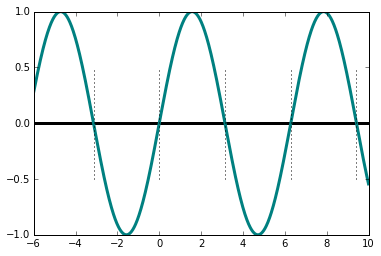

In [16]:
x = linspace(-6, 10, 1000)
y = sin(x)
pl.axhline(color='black', linewidth=3)
pl.plot(x,y, color='teal', linewidth=3)

for z in range(-1, 4):
    pl.axvline(x = z * pi, color='black', linestyle=':', ymin=0.25, ymax=0.75)

Para x0 = 0.5, raíz = -0.000
Para x0 = 1.1, raíz =  0.000
Para x0 = 2.2, raíz =  3.142


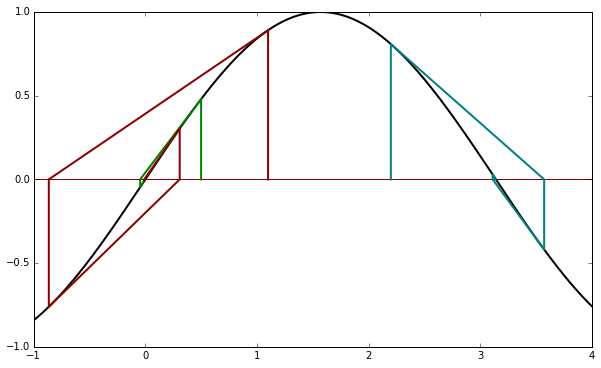

In [17]:
mpl.rcParams['figure.figsize'] = (10,6)

def f(x):
    return sin(x)

def df(x):
    return cos(x)

def newton_points(h):
    # h = [(x0, fx0), (x1, fx1), ...]
    xvalues = []
    yvalues = []
    for x, y in h:
        xvalues.extend([x,x])
        yvalues.extend([0,y])
    return xvalues,yvalues

x = linspace(-1, 4, 1000)
y = sin(x)
pl.axhline(color='darkred')
pl.plot(x,y, color='black', linewidth=2)


for x0, color in [(0.5,'green'), (1.1, 'darkred'), (2.2, 'teal')]:

    x, fx, h = newton(f, df, x0)
    print 'Para x0 = {}, raíz = {:6.3f}'.format(x0, x)
    xpoints, ypoints = newton_points(h)
    pl.plot(xpoints, ypoints, color=color, linewidth=2)

Para x0 = 5.1, raíz = 182.212


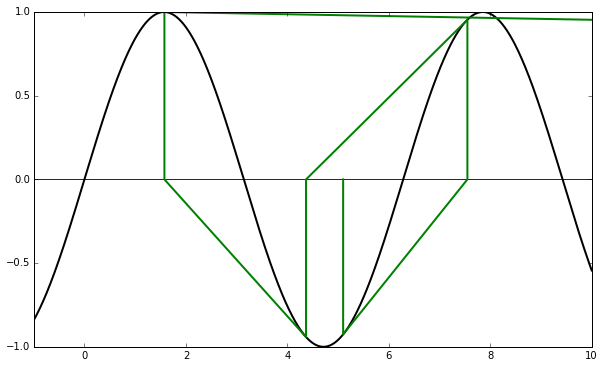

In [18]:
def f(x):
    return sin(x)

def df(x):
    return cos(x)

x = linspace(-1, 10, 1000)
y = sin(x)
pl.axhline(color='darkred')
pl.plot(x,y, color='black', linewidth=2)


for x0, color in [(5.1,'green')]:

    x, fx, h = newton(f, df, x0)
    print 'Para x0 = {}, raíz = {:6.3f}'.format(x0, x)
    xpoints, ypoints = newton_points(h)
    pl.plot(xpoints, ypoints, color=color, linewidth=2)
    pl.xlim(-1,10)

Para x0 = 5.1, raíz = 182.212


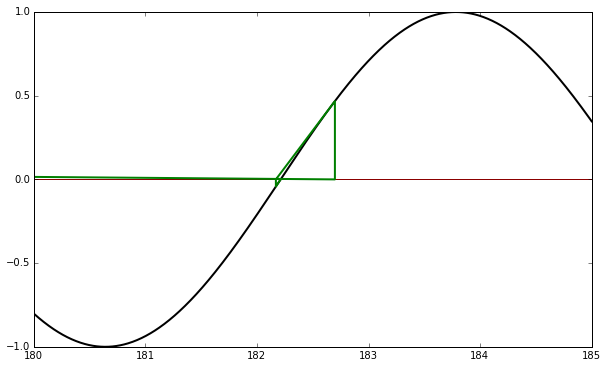

In [19]:
def f(x):
    return sin(x)

def df(x):
    return cos(x)

x = linspace(180, 185, 1000)
y = sin(x)
pl.axhline(color='darkred')
pl.plot(x,y, color='black', linewidth=2)


for x0, color in [(5.1,'green')]:

    x, fx, h = newton(f, df, x0)
    print 'Para x0 = {}, raíz = {:6.3f}'.format(x0, x)
    xpoints, ypoints = newton_points(h)
    pl.plot(xpoints, ypoints, color=color, linewidth=2)
    pl.xlim(180,185)

Para x0 = 1.97, raíz = 2.00 pi


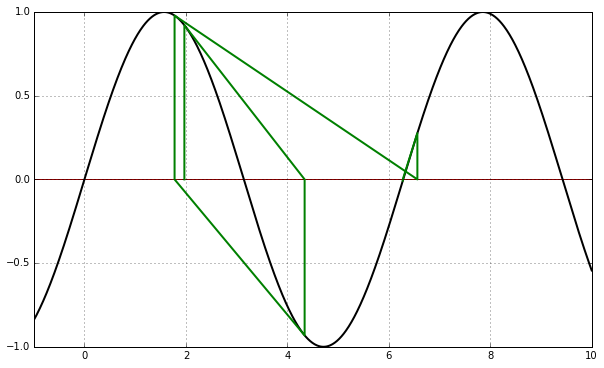

In [20]:
from IPython.html import widgets

def plot_newton(x0):
    def f(x):
        return sin(x)

    def df(x):
        return cos(x)
    x = linspace(-1, 10, 1000)
    y = sin(x)
    pl.axhline(color='darkred')
    pl.plot(x,y, color='black', linewidth=2)
    
    color = 'green'

    x, fx, h = newton(f, df, x0)
    x_pi = x / pi
    print 'Para x0 = {}, raíz = {:4.2f} pi'.format(x0, x_pi)
    xpoints, ypoints = newton_points(h)
    pl.plot(xpoints, ypoints, color=color, linewidth=2)
    pl.xlim(-1,10)
    pl.grid()
    pl.show()

i = widgets.interact(plot_newton, x0=widgets.FloatSliderWidget(min=1.5, max=3.0, step=0.01, value=2.5))